# Assignment 3

In [2]:
%pip install scikit-learn

In [12]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part 1 - PCA

1. Apply PCA projection of the features of the Fashion MNIST dataset in 2 dimensions.
Here, we apply Principle Component Analysis using PCA

---

(), with n_components  = 2 to make it into 2 dimensions

In [5]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

print("PCA transformed data shape:", data_pca.shape)
print(data_pca)

PCA transformed data shape: (70000, 2)
[[ -126.50293754  1632.43233733]
 [ 1407.56479437  -451.68144592]
 [ -725.43035798 -1103.5976319 ]
 ...
 [ -510.60945635  -726.94527121]
 [ -220.99035211 -1412.48240142]
 [-1521.14047237    92.54090804]]


2. Show scatter plot of the reduced dimension. Use separate color for each class of the

['8', '5', '0', '1', '2', '4', '3', '7', '9', '6']


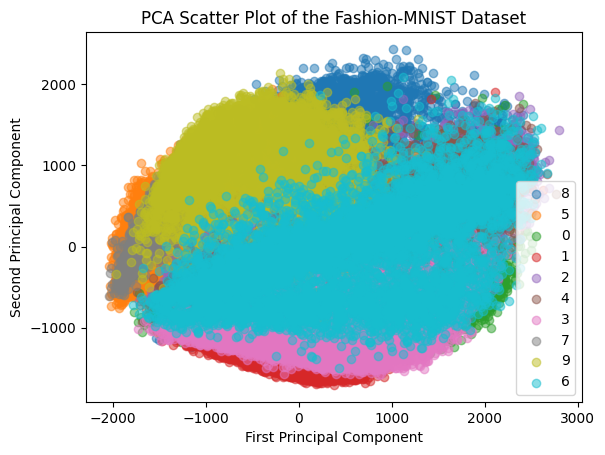

In [6]:
classes = list(set(labels))
print(classes)
colors = ['C{}'.format(i) for i in range(len(classes))]

fig, ax = plt.subplots()
for c, color in zip(classes, colors):
    indices = np.where(labels == c)
    ax.scatter(data_pca[indices, 0], data_pca[indices, 1], c=color, label=c, alpha=0.5)

ax.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot of the Fashion-MNIST Dataset')
plt.show()

Note:
*  0 - Pullover
*  1 - Ankle boot
*  2 - Shirt
*  3 - T-shirt/top
*  4 - Dress
*  5 - Coat
*  6 - Sandal
*  7 - Bag
*  8 - Sneaker
*  9 - Trouser



3. Show how much variance ratio is explained by the reduced dimension.

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for the first two principal components:", explained_variance_ratio)

Explained variance ratio for the first two principal components: [0.2905654  0.17738509]


# Part 2 - Another Reduction Method

1. Apply another reduction method on the features of the Fashion MNIST dataset in 2 dimensions.
We could apply Linear Discriminant Analysis (LDA) mehtod on Fashion MNIST dataset

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit_transform(data, labels)

2. Show scatter plot of the reduced dimension. Use separate color for each class of the data.

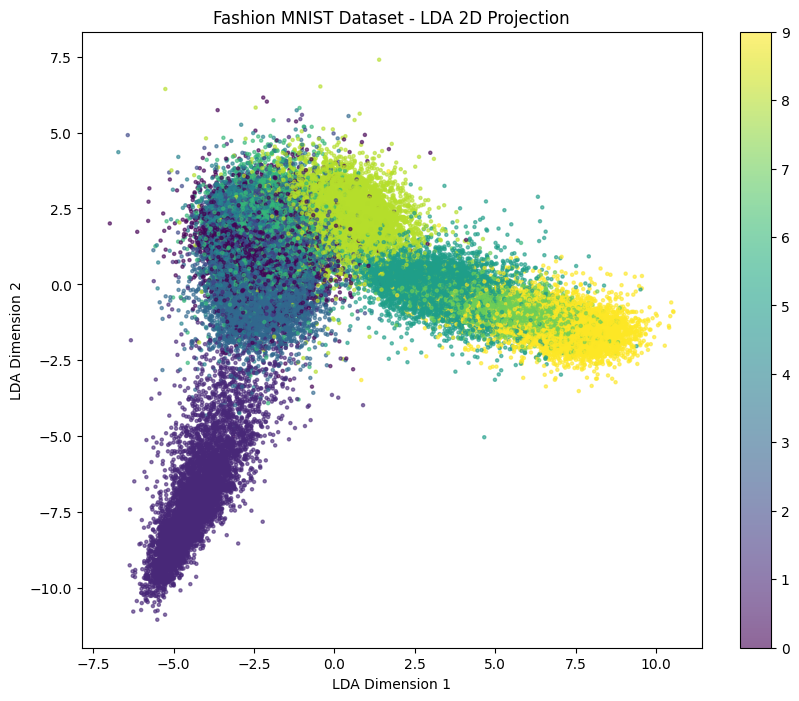

In [14]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_lda[:, 0], data_lda[:, 1], c=labels.astype(int), cmap='viridis', s=5, alpha=0.6)
plt.colorbar(scatter)
plt.title('Fashion MNIST Dataset - LDA 2D Projection')
plt.xlabel('LDA Dimension 1')
plt.ylabel('LDA Dimension 2')
plt.show()

3. Show how much variance ratio is explained by the reduced dimension.

In [16]:
lda_explained_variance_ratio = lda.explained_variance_ratio_
print("LDA Explained variance ratio for the first two principal components:", lda_explained_variance_ratio)

LDA Explained variance ratio for the first two principal components: [0.44775652 0.21875177]


## Part 3 Conceptual Question

1. Compare the variance ratio explained by the 2-dimensions of the methods you have
used. Which is better?


---


PCA:
* Dimension 1: 0.2905654
* Dimension 2: 0.17738509

LDA:
* Dimension 1: 0.44775652
* Dimension 2: 0.21875177

Based on the explained variace ratio calculated in previous sections, we can see that LDA has a higher explained variance ratio for both dimensions compared to PCA. This means that LDA captures more of the variance in the dataset when reduced to 2 dimensions compared to PCA, which suggests that LDA might be a better choice in this case.

2. Compare the scatter plot of the two methods after reduction. Which is a better method
for separating the different classes of data?


---

From the scatter plots generated in previous section, it's clear that PCA doesn't show well-defined boundaries amongst the different classes. On the other hand, LDA reveals more noticeable separations among the classes.This indicates that LDA is a better method for seperating various classes of data. This conclusion is also in line with our previous observation in Question 1, where LDA had a higher explained variance ratio for both dimensions.

3.What is the primary difference between the two methods? Which method works better
in this case and why?


---

The primary difference between PCA and LDA lies in 1) the objective and 2) whether they are supervised or unsupervised methods.

PCA is an unsupervised method that aims to capture the maximum variance in the dataset by finding orthogonal directions (principal components) that explain the most variation in the data. It does not take into account class labels and focuses on preserving the overall structure of the data.

LDA, on the other hand, is a supervised method that seeks to maximize the separation between different classes in the reduced space. It takes into account class labels and finds the directions that best discriminate between the classes.


For the Fashion MNIST dataset, LDA seems to work better at separating the different classes of data. The scatter plots reveal more noticable separations among classes for LDA compared to PCA. Additionally, LDA has a higher explained variance ratio for both dimensions, meaning it captures more of the dataset's total variance when reduced to 2D.It works better is because it is designed to seprate classes, taking into account the class lables. PCA, being an unsupervised method, is more focused on preserving the overall structure of the data, which may not necessarily lead to clear class separation.

